In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pulp

res_1 = {'A':2, 'B':3, 't':30, 'n':2}
res_2 = {'A':3, 'B':2, 't':30, 'n':2}
res_3 = {'A':3, 'B':3, 't':22, 'n':3}
res = {'res_1':res_1, 'res_2':res_2, 'res_3':res_3}
profit_A = 3000
profit_B = 2500

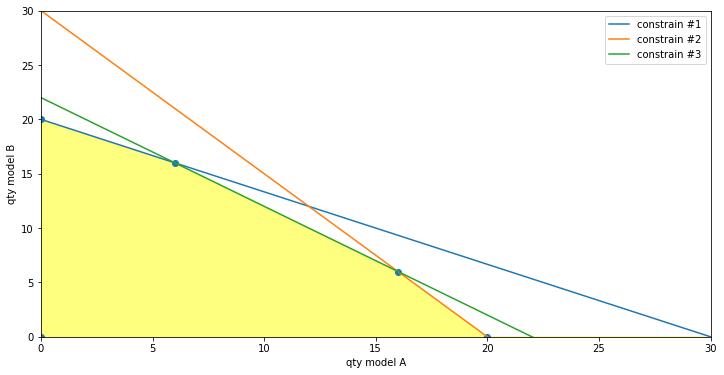

In [2]:
a = np.linspace(0, 30, 30)
c1 = ((res['res_1']['t'] * res['res_1']['n'])-
      res['res_1']['A']*a) / res['res_1']['B']
c2 = ((res['res_2']['t'] * res['res_2']['n'])-
      res['res_2']['A']*a) / res['res_2']['B']
c3 = ((res['res_3']['t'] * res['res_3']['n'])-
      res['res_3']['A']*a) / res['res_3']['B']

plt.figure(figsize=(12, 6))
plt.plot(a, c1, label='constrain #1')
plt.plot(a, c2, label='constrain #2')
plt.plot(a, c3, label='constrain #3')

axes = plt.gca()
axes.set_xlim([0,30])
axes.set_ylim([0,30])
plt.xlabel('qty model A')
plt.ylabel('qty model B')

border = np.array((c1,c2,c3)).min(axis=0)

plt.fill_between(a, border, color='yellow', alpha=0.5)
plt.scatter(*zip(*[(0,0), (20,0), 
                   (0,20), (16,6), (6,16)]))
plt.legend()
plt.show()

In [3]:
model = pulp.LpProblem("max_profit", pulp.LpMaximize)
A = pulp.LpVariable('A', lowBound=0)
B = pulp.LpVariable('B', lowBound=0)

In [4]:
model += profit_A * A + profit_B * B

model += res['res_1']['A'] * A + res['res_1']['B'
            ] * B <= res['res_1']['t'] * res['res_1']['n']
model += res['res_2']['A'] * A + res['res_2']['B'
            ] * B <= res['res_2']['t'] * res['res_2']['n']
model += res['res_3']['A'] * A + res['res_3']['B'
            ] * B <= res['res_3']['t'] * res['res_3']['n']

In [5]:
model.solve()
print (f"Completion status: {pulp.LpStatus[model.status]}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.7/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/f1782d48c9f6455fb0334d46d0599d60-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/f1782d48c9f6455fb0334d46d0599d60-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj -0 Dual inf 5500 (2)
0  Obj -0 Dual inf 5500 (2)
2  Obj 63000
Optimal - objective value 63000
Optimal objective 63000 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.01

Completion status: Optimal


In [6]:
print (f"Production of model A = {A.varValue:0.1f}")
print (f"Production of model B = {B.varValue:0.1f}")

Production of model A = 16.0
Production of model B = 6.0


In [7]:
print (f"Maximum profit achieved: {pulp.value(model.objective):0.1f}")

Maximum profit achieved: 63000.0
